In [866]:
import os
from generate import convert_jpg_to_png, prepare_foreground, select_background, find_position, get_angles
from generate import SOURCE_DIR, BORDER_SIZE

In [867]:
if not os.path.exists("./data/converted/"):
    convert_jpg_to_png()
else:
    print("CONVERTED IMAGES ALREADY EXIST")

cards = []
for card in os.listdir(f'./data/{SOURCE_DIR}/'):
    cards.append(f'./data/{SOURCE_DIR}/{card}')

CONVERTED IMAGES ALREADY EXIST


In [868]:
path = cards[0]
path

'./data/converted/1.png'

In [869]:
img, copy = prepare_foreground(path, 310)

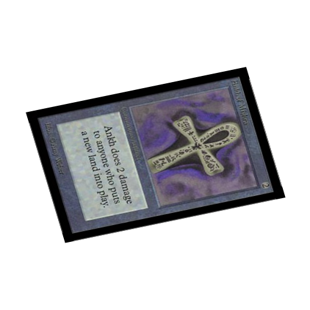

In [870]:
img

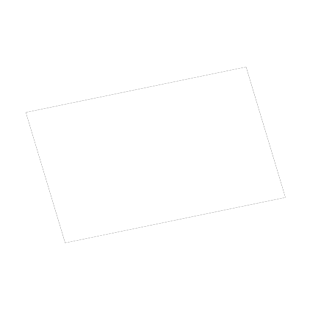

In [871]:
copy

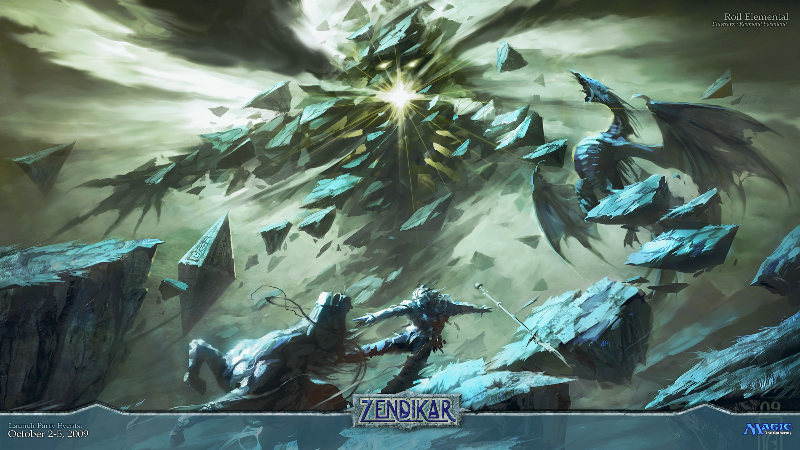

In [872]:
from image_transformer import ImageTransformer
import torchvision.transforms as transforms

bg_path = select_background()
bg = ImageTransformer(bg_path, (800, 450), 0)
background = transforms.ToPILImage()(bg.image).convert("RGBA")
background

In [873]:
from random import randint

x = randint(0, background.size[0] - img.size[0])
y = randint(0, background.size[1] - img.size[1])

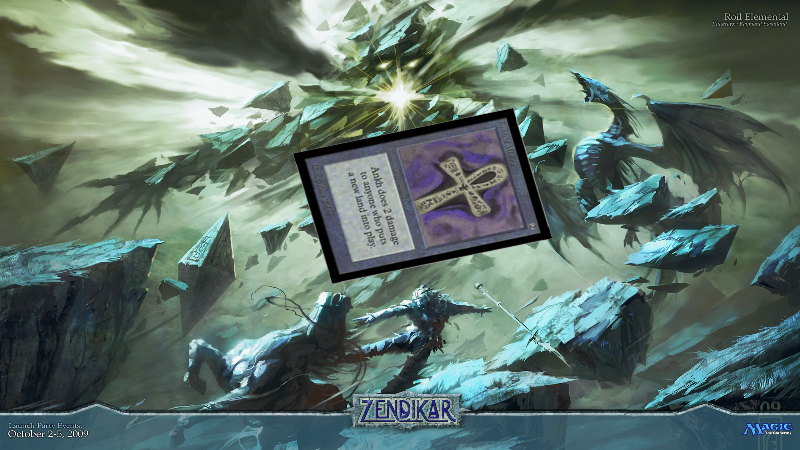

In [874]:
background.paste(img, (x, y), img)
background

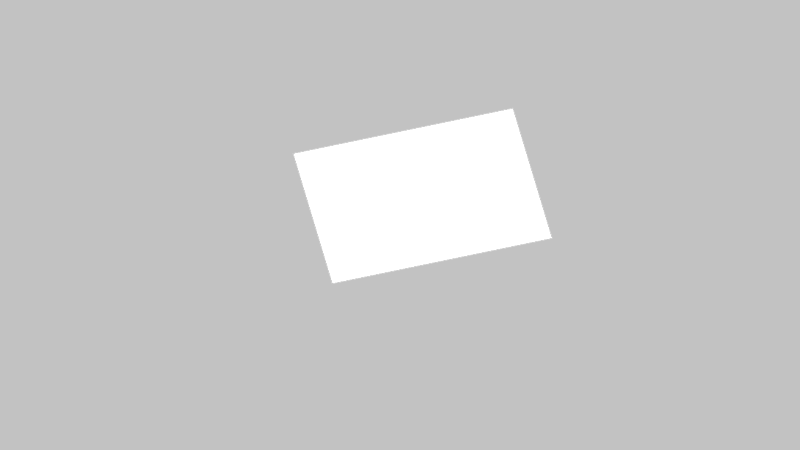

In [875]:
import numpy as np

background_copy = np.ones_like(background) * 100
background_copy = transforms.ToPILImage()(background_copy)
background_copy.paste(copy, (x, y), copy)
background_copy

In [876]:
x, y

(267, 41)

In [877]:
background_copy = np.array(background_copy)
background_copy.shape

(450, 800, 4)

In [878]:
position = find_position(background_copy)
position

array([294, 109, 258, 174])

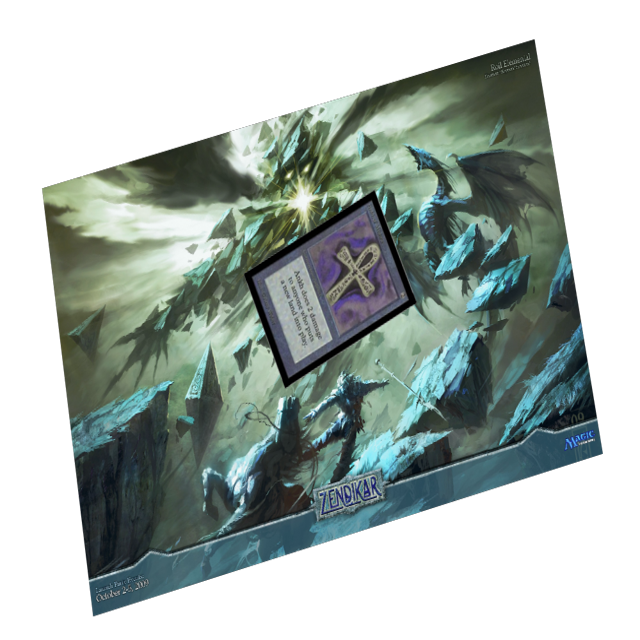

In [879]:
theta, phi, gamma = get_angles(max_theta=30, max_phi=30, max_gamma=15)
bg.image = bg.prepare_borders(np.array(background), BORDER_SIZE)
rotated_bg, _, M = bg.rotate_along_axis(theta=theta, phi=phi, gamma=gamma)
background = transforms.ToPILImage()(rotated_bg).resize((640, 640))
background

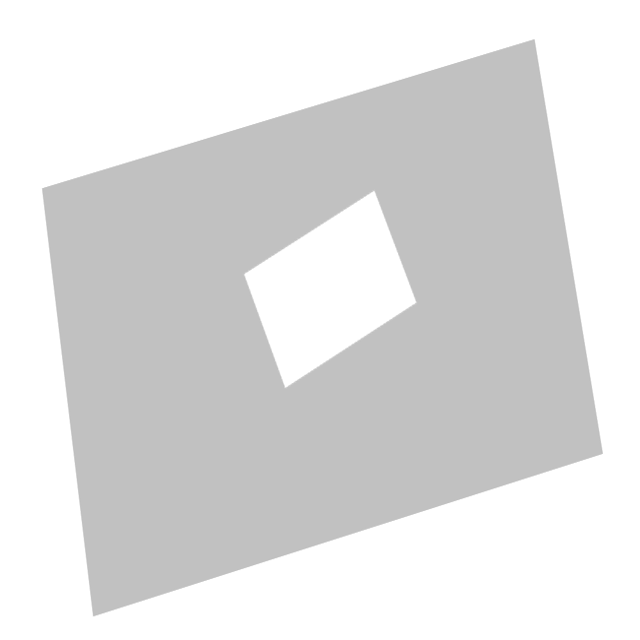

In [880]:
bg.image = bg.prepare_borders(np.array(background_copy), BORDER_SIZE)
rotated_bgc, _, M = bg.rotate_along_axis(theta=theta, phi=phi, gamma=gamma)
background_copy = transforms.ToPILImage()(rotated_bgc).resize((640, 640))
background_copy

In [881]:
position = find_position(background_copy)
position

array([245,  53, 170,   1])

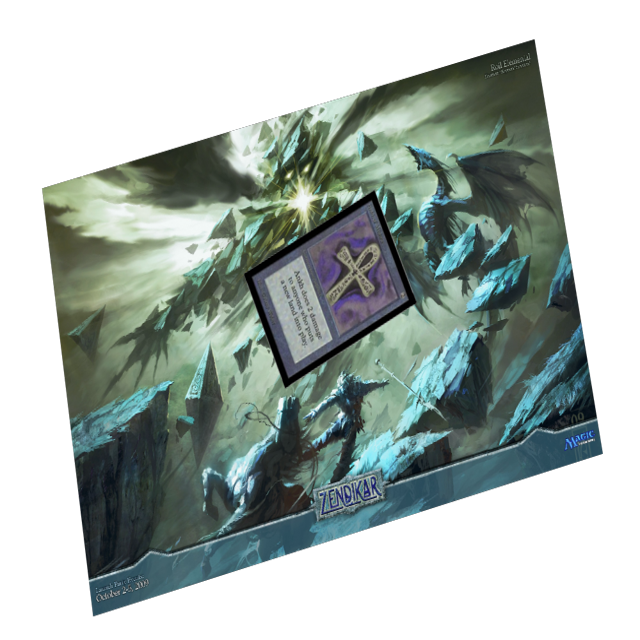

In [882]:
background

In [883]:
np.array(background).shape

(640, 640, 4)

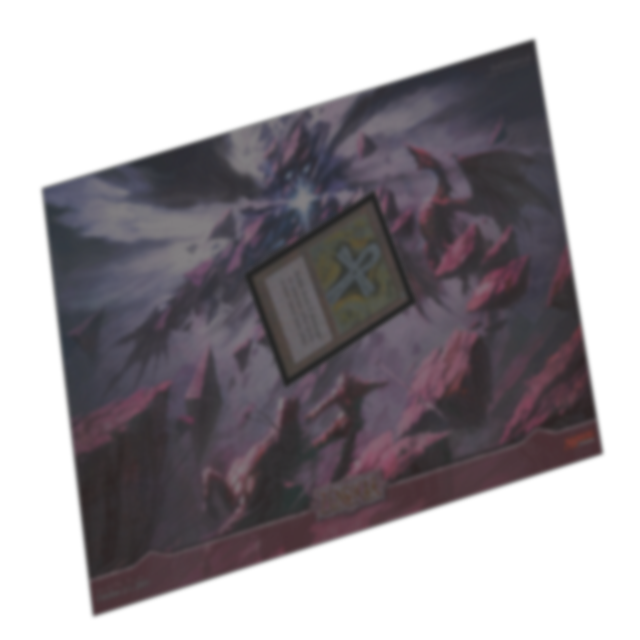

In [884]:
from PIL import ImageFilter

jitter = transforms.ColorJitter(brightness=0.1, contrast=1, saturation=0.5, hue=0.5)
to_jitter = transforms.ToPILImage()(np.array(background)[:,:,:3])
jittered_bg = np.array(jitter(to_jitter))
background_array = np.array(background)
background_array[:,:,:3] = jittered_bg
jittered_bg = transforms.ToPILImage()(background_array)
blurred_bg = jittered_bg.filter(ImageFilter.GaussianBlur())
blurred_bg